In [1]:
import torch

In [2]:
x = torch.normal(1,0.1,(1,9))
w = torch.normal(0.5,0.1,(9,3))

In [3]:
y = x @ w

In [4]:
print(x)
print(w)
print(y)

tensor([[1.0381, 0.8357, 0.9146, 0.9677, 1.0338, 0.9838, 1.0702, 0.8142, 0.9902]])
tensor([[0.3701, 0.3683, 0.4530],
        [0.5122, 0.6082, 0.4259],
        [0.5812, 0.5009, 0.5063],
        [0.7175, 0.4698, 0.5425],
        [0.5241, 0.3080, 0.6049],
        [0.6049, 0.5661, 0.5487],
        [0.4162, 0.6557, 0.5265],
        [0.5097, 0.6063, 0.5255],
        [0.4875, 0.5360, 0.6599]])
tensor([[4.5183, 4.4049, 4.6240]])


In [5]:
x = torch.ones((2,4))
y = torch.normal(1,0.1,(2,4))

In [6]:
torch.cat((x,y),dim=0)

tensor([[1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0523, 1.0378, 1.0468, 1.1898],
        [1.1036, 0.9604, 0.9264, 1.1668]])

In [7]:
torch.cat((x,y),dim=1)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0523, 1.0378, 1.0468, 1.1898],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.1036, 0.9604, 0.9264, 1.1668]])

In [8]:
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [9]:
x / x.sum(axis=1,keepdims=True)

tensor([[0.2500, 0.2500, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.2500, 0.2500]])

In [10]:
x.sum(axis=1,keepdims=True)

tensor([[4.],
        [4.]])

In [11]:
a = torch.normal(1,0.1,(5,6))
x = torch.arange(6)
print(a.shape)
print(x.shape)

torch.Size([5, 6])
torch.Size([6])


In [12]:
a * x

tensor([[0.0000, 1.0473, 1.6716, 2.9294, 3.9192, 6.3811],
        [0.0000, 1.0130, 1.9136, 2.7981, 3.9815, 4.8338],
        [0.0000, 0.9241, 2.0090, 2.8767, 4.3300, 4.8596],
        [0.0000, 1.0688, 2.3496, 3.0030, 3.5157, 4.9931],
        [0.0000, 0.9872, 1.8773, 2.8127, 3.8302, 5.4572]])

## Auto Differentiation

In [13]:
import torch

In [14]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [15]:
x.requires_grad_(True)
x.grad

In [16]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [17]:
y.backward()

In [18]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [19]:
x.grad == 4 * x

tensor([True, True, True, True])

In [20]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [21]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [22]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [23]:
x.grad

tensor([0., 1., 4., 9.])

## Review on Statistics

In [24]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [25]:
fair_probs = torch.ones([6]) / 6

In [26]:
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [27]:
counts = multinomial.Multinomial(10000,fair_probs).sample()
counts/10000

tensor([0.1797, 0.1639, 0.1689, 0.1581, 0.1674, 0.1620])

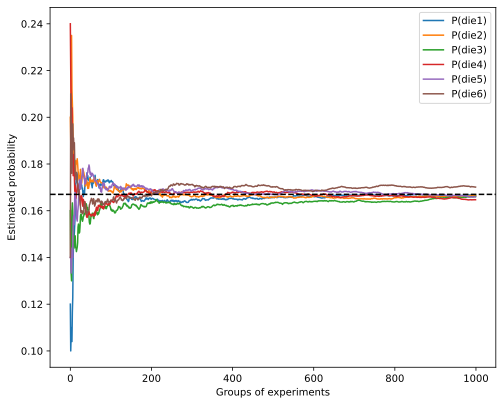

In [28]:
counts = multinomial.Multinomial(50,fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdims=True)

d2l.set_figsize((8,6.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=("P(die"+str(i+1)+")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [29]:
counts.shape

torch.Size([1000, 6])

In [30]:
cum_counts.shape

torch.Size([1000, 6])

In [31]:
estimates.shape

torch.Size([1000, 6])

## Regression

In [32]:
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [33]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [34]:
class Timer:
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        self.tik = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.tik)
        return sum(self.times) / len(self.times)
    
    def avg(self):
        return sum(self.times) / len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [35]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.07121 sec'

In [36]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.03610 sec'

In [37]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

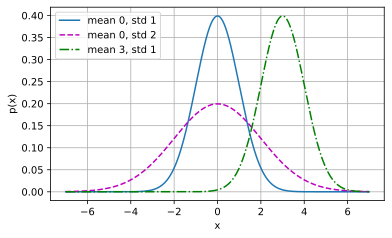

In [38]:
x = np.arange(-7, 7, 0.01)

params = [(0,1),(0,2),(3,1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
        ylabel = 'p(x)',figsize=(6,3.5),
        legend = [f'mean {mu}, std {sigma}' for mu, sigma in params])

In [39]:
import random
import torch
from d2l import torch as d2l

In [40]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

In [41]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([0.0310, 0.3278]) 
label: tensor([3.1483])


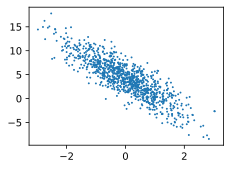

In [42]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [43]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
        indices[i:min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [44]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.9511,  1.1859],
        [ 0.5566, -0.4898],
        [-2.3714,  0.0899],
        [-1.3150, -0.5335],
        [-1.8356, -0.4538],
        [-1.2817, -1.3161],
        [-1.3191,  0.0729],
        [ 0.1022,  0.2800],
        [ 0.1859,  0.4710],
        [ 0.6873, -1.4341]]) 
 tensor([[ 4.0628],
        [ 6.9547],
        [-0.8705],
        [ 3.3919],
        [ 2.0465],
        [ 6.1129],
        [ 1.3082],
        [ 3.4439],
        [ 2.9634],
        [10.4472]])


In [46]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [47]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [48]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [72]:
lr = 0.085
num_epochs = 25
net = linreg
loss = squared_loss

In [73]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, w, b)
        l = loss(y_hat, y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        if epoch % 5 == 0:
            print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')
print(f'w estimated error: {true_w - w.reshape(true_w.shape)}')
print(f'b estimated error: {true_b - b}')

epoch 1,loss 15.496668
epoch 6,loss 6.544459
epoch 11,loss 1.751700
epoch 16,loss 0.863725
epoch 21,loss 0.346946
w estimated error: tensor([ 0.1752, -0.2682], grad_fn=<SubBackward0>)
b estimated error: tensor([0.4659], grad_fn=<RsubBackward1>)
